In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
hrdata_df = pd.read_csv('HR_comma_sep.csv')
left_company = hrdata_df.loc[(hrdata_df['left'] == 1)]
accident = hrdata_df.loc[(hrdata_df['Work_accident'] > 0)]
left_company.head(10)


#The Columns are: Satisfaction Level (Ratio), Last Evaluation (Ratio), Number of Projects (Ratio), Avg Monthly Hours (ratio)
#Time Spent at Company (Ratio), Work Accident (Ratio), Left (Categorical), 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
2005,0.36,0.95,3,206,4,0,0,0,sales,low
2006,0.54,0.37,2,176,2,0,0,0,sales,low
2007,0.99,0.91,5,136,4,0,0,0,sales,low
2008,0.50,0.75,6,127,3,0,0,0,sales,low
2009,0.74,0.64,4,268,3,0,0,0,sales,low


/Users/bryancorder/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


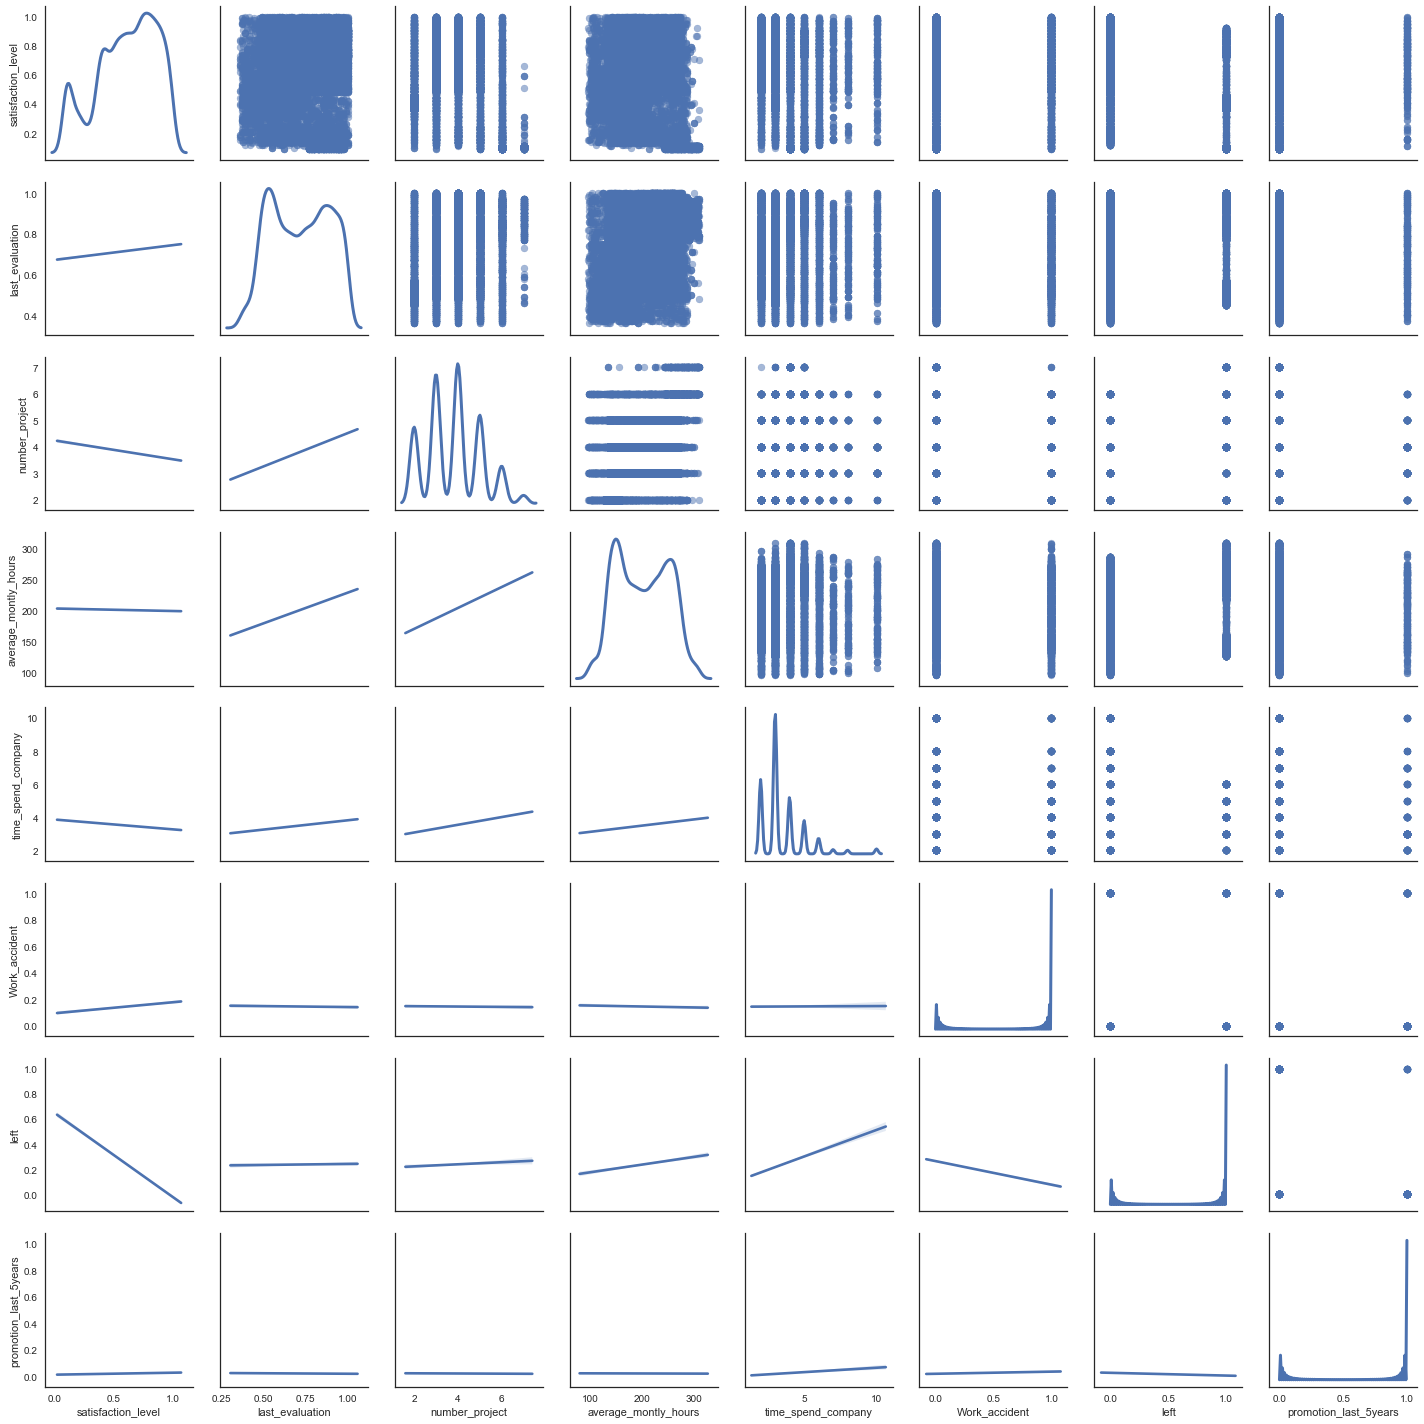

In [3]:
sns.set_style("white")
df_jittered = hrdata_df.loc[:, 'satisfaction_level':'promotion_last_5years'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns)
    
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


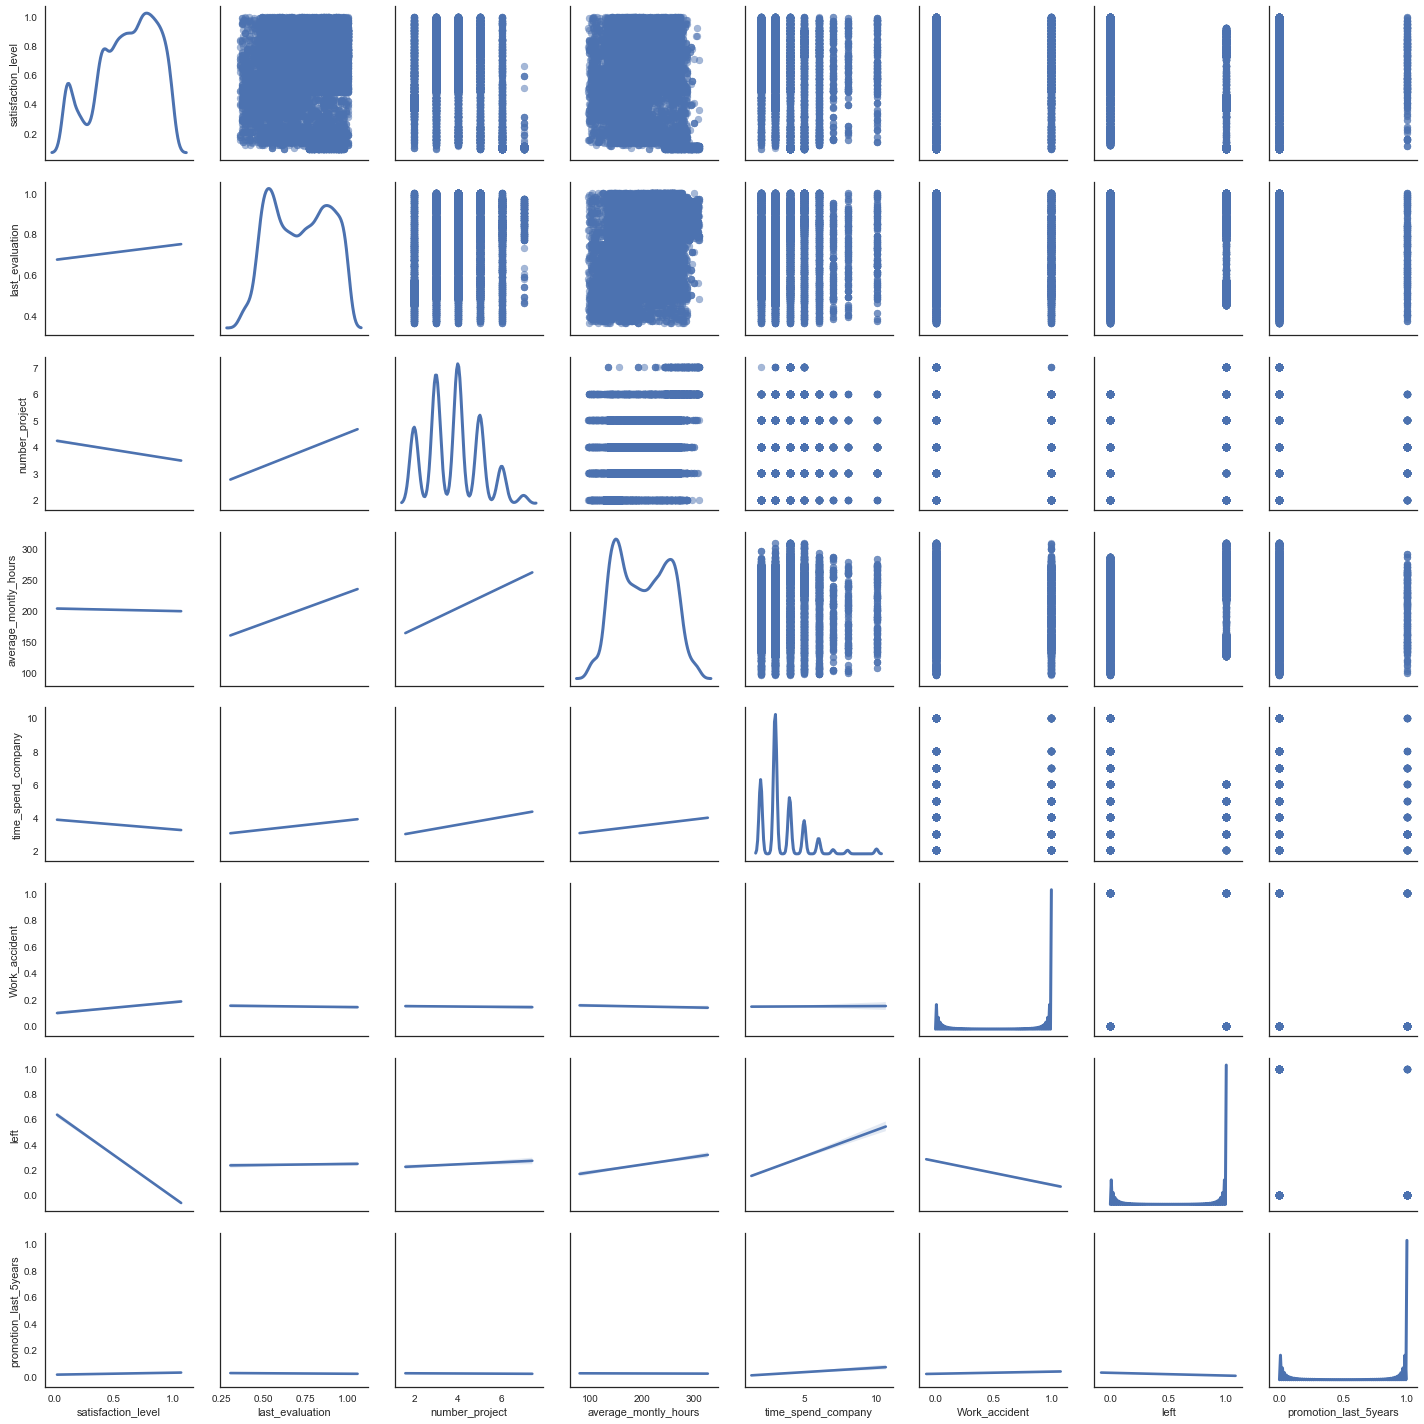

In [4]:
sns.set_style("white")

g = sns.PairGrid(hrdata_df.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

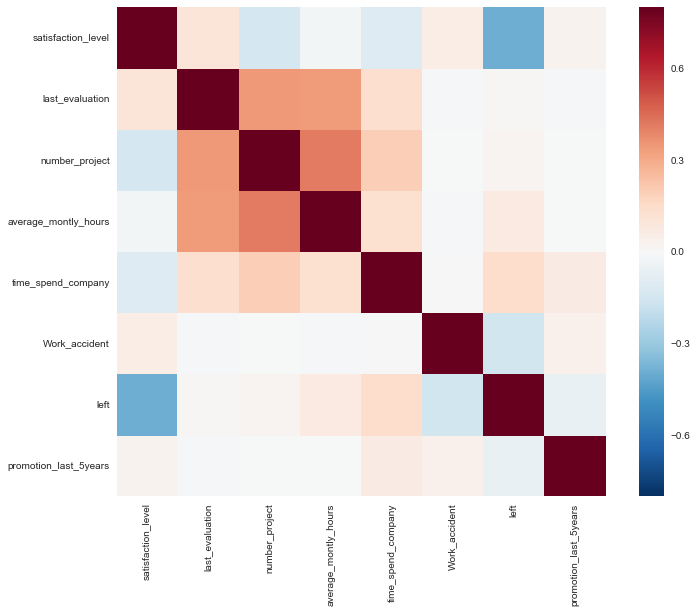

In [5]:
corrmat = hrdata_df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [6]:
"""df_long = hrdata_df
df_long = pd.melt(df_long, id_vars=['left'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "left", "value")
plt.show()

# Descriptive statistics by group.
print(hrdata_df.groupby('left').describe())

# Test whether group differences are significant.
for col in hrdata_df.loc[:,'satisfaction_level':'promotion_last_5years'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[hrdata_df['left'] == '0'][col].dropna(),
        df_czch[hrdata_df['left'] == '1'][col].dropna()
    ))"""

'df_long = hrdata_df\ndf_long = pd.melt(df_long, id_vars=[\'left\'])\n\ng = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)\ng = g.map(sns.boxplot, "left", "value")\nplt.show()\n\n# Descriptive statistics by group.\nprint(hrdata_df.groupby(\'left\').describe())\n\n# Test whether group differences are significant.\nfor col in hrdata_df.loc[:,\'satisfaction_level\':\'promotion_last_5years\'].columns:\n    print(col)\n    print(stats.ttest_ind(\n        df_czch[hrdata_df[\'left\'] == \'0\'][col].dropna(),\n        df_czch[hrdata_df[\'left\'] == \'1\'][col].dropna()\n    ))'

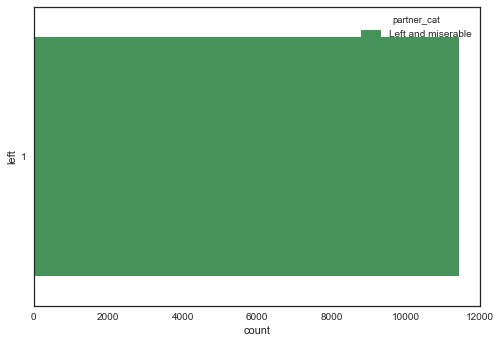

partner_cat  Left and miserable
left                           
1                         11428
Power_divergenceResult(statistic=0.0, pvalue=nan)
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
     ... 
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
1    None
Name: partner_cat, Length: 14999, dtype: object


In [12]:
# Add a second categorical variable.
df_2cat = hrdata_df.loc[
    hrdata_df['left'],
    ['left','satisfaction_level']
]

# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.loc[(df_2cat['left'] == 0) & (df_2cat['satisfaction_level'] > 0.50), 'partner_cat'] = 'Stayed and happy'
df_2cat.loc[(df_2cat['left'] == 1) & (df_2cat['satisfaction_level'] < 0.501), 'partner_cat'] = 'Left and miserable'

# Plot counts for each combination of levels.
sns.countplot(y="left", hue="partner_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['left'], df_2cat['partner_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))
print(df_2cat['partner_cat'])